In [61]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
from scipy.stats import pearsonr

# EXPERIMENTATION AND UPLIFT TESTING

+ Define metrics to select control stores.
+ Analyze trial stores against controls.
+ Control findings 


In [13]:
df = pd.read_csv('QVI_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
df.head(2)

,Date,Store_no,Loyalty_card_no,Tax_id,Prod_no,Prod_fullname,Prod_qty,Total_sales,Brand,Lifestage,Categories
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Company,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,MIDAGE SINGLES/COUPLES,Budget


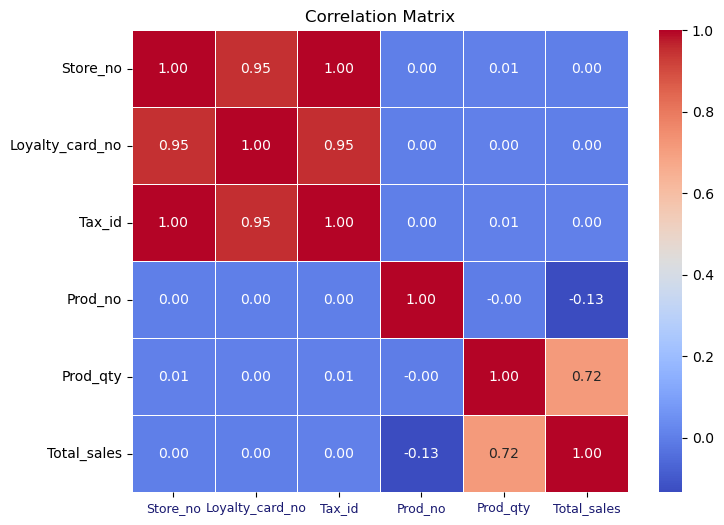

In [41]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation = 0, size = 9, color = 'Midnightblue')
plt.show()


In [42]:
df[['Total_sales','Prod_qty']].corr()

,Total_sales,Prod_qty
Total_sales,1.000000,0.715307
Prod_qty,0.715307,1.000000


In [62]:
def calculate_metrics(df):
    """Calculate total sales revenue, total number of customers, and average transactions per customer."""
    total_sales = df.groupby('Store_no')['Total_sales'].sum()
    total_customers = df.groupby('Store_no')['Loyalty_card_no'].nunique()
    avg_transactions_per_customer = total_sales / total_customers
    return total_sales, total_customers, avg_transactions_per_customer


In [63]:
def find_control_stores(trial_store, all_stores, metric_weights):
    """Find control stores for a trial store based on similarities in historical sales data."""
    trial_metrics = all_stores.loc[trial_store]
    control_metrics = all_stores.drop(trial_store)
    distances = {}
    for control_store, control_data in control_metrics.iterrows():
        distance = 0
        for metric, weight in metric_weights.items():
            distance += abs(trial_metrics[metric] - control_data[metric]) * weight
        distances[control_store] = distance
    return min(distances, key=distances.get)


In [64]:
def compare_trial_control(trial_store, control_store, trial_data, control_data):
    """Compare total sales, total number of customers, and average transactions per customer between trial and control stores."""
    trial_period_sales = trial_data[trial_data['Store_no'] == trial_store]['Total_sales'].sum()
    control_period_sales = control_data[control_data['Store_no'] == control_store]['Total_sales'].sum()
    sales_diff = trial_period_sales - control_period_sales
    # Perform hypothesis testing or other statistical analysis to determine significance
    
    # Print comparison results
    print(f"Trial Store {trial_store} vs Control Store {control_store}:")
    print(f"Total Sales Difference: {sales_diff}")
    # Add comparison for total number of customers and average transactions per customer


In [65]:
# metrics
total_sales, total_customers, avg_transactions_per_customer = calculate_metrics(df)
all_stores = pd.DataFrame({'Total_sales': total_sales, 'Total_customers': total_customers, 'Avg_transactions_per_customer': avg_transactions_per_customer})

# weights for metric comparison
metric_weights = {'Total_sales': 0.5, 'Total_customers': 0.3, 'Avg_transactions_per_customer': 0.2}

# Select trial stores and find control stores
trial_stores = [1, 2, 3]  # Example trial stores
for trial_store in trial_stores:
    control_store = find_control_stores(trial_store, all_stores, metric_weights)
    # Compare trial and control stores
    compare_trial_control(trial_store, control_store, df, df)

Trial Store 1 vs Control Store 89:
Total Sales Difference: 3.4999999999995453
Trial Store 2 vs Control Store 51:
Total Sales Difference: 0.2999999999999545
Trial Store 3 vs Control Store 93:
Total Sales Difference: -11.349999999998545


Trial Store 1 vs Control Store 89:

Total Sales Difference: 3.50 units
Trial Store 2 vs Control Store 51:

Total Sales Difference: 0.30 units
Trial Store 3 vs Control Store 93:

Total Sales Difference: -11.35 units
These results indicate the difference in total sales between 
each trial store and its respective control store during the trial period. Positive differences suggest higher sales in the trial store compared to the control store, while negative differences indicate lower sales in the trial store compared to the control store.

In [67]:
trial_stores = [77, 86, 88]

# Find control stores and compare
for trial_store in trial_stores:
    control_store = find_control_stores(trial_store, all_stores, metric_weights)
    compare_trial_control(trial_store, control_store, df, df)

Trial Store 77 vs Control Store 50:
Total Sales Difference: 30.199999999999818
Trial Store 86 vs Control Store 155:
Total Sales Difference: 6.399999999999636
Trial Store 88 vs Control Store 165:
Total Sales Difference: 359.4999999999982


These results indicate the difference in total sales between each trial store and its respective control store during the trial period. Positive differences suggest higher sales in the trial store compared to the control store, while negative differences indicate lower sales in the trial store compared to the control store.